# Data Wrangling and Inital EDA
Messy notebook mainly for experimenting with collection of data, and putting datasets together into useable form. 

Primary dataset has been scraped from Billboard 100 lists and Spotify API. Collected and curated data was fortunately provided in a clean form on 
Datasets derived from Spotify API which has some kind of pre-rolled statistics about the music in top 100. Drawback here obviously that we don't necessarily know how they calculate these. Maybe something to consider for version 2.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path.append('../src')
import dataset

In [3]:
# Read in raw datasets
df_bb = pd.read_csv('../data/raw/hot_stuff_2.csv') # Billboard data
df_af = pd.read_csv('../data/raw/hot_100_audio_features.csv') # Audio features collected from Spotify

In [4]:
df_bb.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart
0,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [5]:
# This command can take a REALLY long time depending on parameters since it scrapes Genius for lyrics.
#df_proc1 = dataset.proc_df_init('../data/raw/hot_100_audio_features.csv', 
#                                '../data/raw/hot_stuff_2.csv')
df_proc1 = pd.read_feather('../data/processed/stage1_lyrics.feather')

In [7]:
df_proc1.head()

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance
0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,...,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...,8,20,1
1,JeanOliver,5v4sUZA2Oyni7EtBL586V7,['alternative hip hop'],200066.0,29.0,0.323,0.127,3.0,-15.660,True,...,0.1170,0.394,92.637,3.0,Oliver,Jean,"Jean, Jean, roses are red\nAll the leaves have...",2,14,1
2,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,...,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"[Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...",3,21,1
3,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,...,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"[Chorus]\nI've got to get away, I've got to ge...",14,16,1
4,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,...,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,#\n2Pac - Picture Me Rollin'\n50 Cent - Get In...,3,25,1


In [8]:
for i in df_proc1['lyrics'][0].split('\n'):
    print(i)

[Intro: Daz Dillinger & (Snoop Dogg)]
(Ugh) Ha-ha-ha, I'm serious, nigga
One of y'all niggas got some bad motherfuckin' breath
(Oh, man) Aye, baby, aye, baby, (shit) aye, baby
Get some bubblegum in this motherfucker or somethin'
Aye, nigga, get somethin' to eat, dog
Aye, nigga, study long, study wrong, nigga

[Verse 1: Snoop Dogg]
With so much drama in the L-B-C
It's kind of hard bein' Snoop D-O-double-G
But I, somehow, some way
Keep comin' up with funky-ass shit, like, every single day
May I kick a little something for the G's
And make a few ends as I breach through?
Two in the mornin' and the party's still jumpin'
‘Cause my momma ain't home
I got bitches in the livin' room gettin' it on
And they ain't leavin' till six in the mornin'
So what you wanna do?
Shit, I got a pocket full of rubbers and my homeboys do too
So turn off the lights and close the doors
But (but what?) we don't love them hoes, yeah
So we gon' smoke a ounce to this
G's up, hoes down, while you motherfuckers bounce t

In [9]:
df_bb[['songid', 'peak_position', 'weeks_on_chart', 'instance']].groupby('songid').agg({'peak_position': 'min', 'weeks_on_chart': 'max', 'instance': 'max'}).reset_index()

,songid,peak_position,weeks_on_chart,instance
0,"""B"" GirlsYoung And Restless",54,15,1
1,"""Cherry Cherry"" from Hot August NightNeil Diamond",31,10,1
2,"""Having A Party"" MedleyThe Ovations (Featuring...",56,9,1
3,"""Joy"" Pt. IIsaac Hayes",30,9,1
4,"""Roots"" MedleyQuincy Jones",57,7,1
...,...,...,...,...
28188,teachmeMusiq Soulchild,42,20,1
28189,whoa (mind in awe)XXXTENTACION,37,3,2
28190,whoknowsMusiq,65,13,1
28191,www.memoryAlan Jackson,45,15,1


In [10]:
df_bb.shape

(317795, 10)

In [13]:
df_bb.sort_values(by='weekid', ascending=False).head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart
291198,https://www.billboard.com/charts/hot-100/2019-...,2019-06-22,35,Better,Khalid,BetterKhalid,1,34.0,8,39
120370,https://www.billboard.com/charts/hot-100/2019-...,2019-06-22,47,Press,Cardi B,PressCardi B,1,16.0,16,2
288397,https://www.billboard.com/charts/hot-100/2019-...,2019-06-22,13,Sweet But Psycho,Ava Max,Sweet But PsychoAva Max,1,10.0,10,26
133526,https://www.billboard.com/charts/hot-100/2019-...,2019-06-22,46,Good As You,Kane Brown,Good As YouKane Brown,1,41.0,36,16
153582,https://www.billboard.com/charts/hot-100/2019-...,2019-06-22,50,Go Loko,"YG, Tyga & Jon Z","Go LokoYG, Tyga & Jon Z",1,50.0,50,6


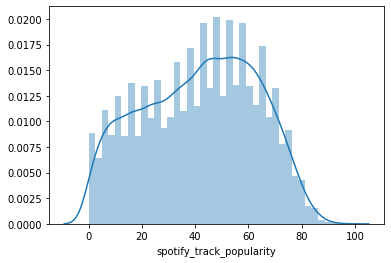

In [15]:
sns.distplot(df_af.dropna().spotify_track_popularity)

In [16]:
len(pd.unique(df_bb.performer))

9553

## Genius API Scraper
Lyricsgenius helps us use the Genius API to extract lyrics we're looking for.

In [17]:
import lyricsgenius

In [18]:
token = 'QOkPNsgDXBxuex27C6TWN2R0EQJ5pol4baxhYde0rxlGoAZ2Hfyb3OpLXm52e8ta'
genius = lyricsgenius.Genius(token)

In [19]:
song = genius.search_song('gin and juice', 'snoop')

Searching for "gin and juice" by snoop...
Done.


In [20]:
artist = genius.search_artist('Snoop ', max_songs=1)

Searching for songs by Snoop ...

Changing artist name to 'Snoop Dogg'
Song 1: "Gin and Juice"

Reached user-specified song limit (1).
Done. Found 1 songs.


In [21]:
song.lyrics

"[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) Ha-ha-ha, I'm serious, nigga\nOne of y'all niggas got some bad motherfuckin' breath\n(Oh, man) Aye, baby, aye, baby, (shit) aye, baby\nGet some bubblegum in this motherfucker or somethin'\nAye, nigga, get somethin' to eat, dog\nAye, nigga, study long, study wrong, nigga\n\n[Verse 1: Snoop Dogg]\nWith so much drama in the L-B-C\nIt's kind of hard bein' Snoop D-O-double-G\nBut I, somehow, some way\nKeep comin' up with funky-ass shit, like, every single day\nMay I kick a little something for the G's\nAnd make a few ends as I breach through?\nTwo in the mornin' and the party's still jumpin'\n‘Cause my momma ain't home\nI got bitches in the livin' room gettin' it on\nAnd they ain't leavin' till six in the mornin'\nSo what you wanna do?\nShit, I got a pocket full of rubbers and my homeboys do too\nSo turn off the lights and close the doors\nBut (but what?) we don't love them hoes, yeah\nSo we gon' smoke a ounce to this\nG's up, hoes down, while y

In [22]:
song = genius.search_song('g thang', 'dr dre')

Searching for "g thang" by dr dre...
Done.


In [23]:
song.lyrics

"[Produced by Dr. Dre]\n\n[Verse 1: Snoop Dogg & Dr. Dre]\nOne, two, three and to the four\nSnoop Doggy Dogg and Dr. Dre is at the door\nReady to make an entrance so back on up\n‘Cause you know we're 'bout to rip shit up\nGive me the microphone first so I can bust like a bubble\nCompton and Long Beach together, now you know you in trouble\nAin't nuthin' but a G thang, baby\nTwo loc'ed out niggas so we're crazy\nDeath Row is the label that pays me\nUnfadeable so please don't try to fade this (Hell yeah)\nBut um, back to the lecture at hand\nPerfection is perfected so I'ma let 'em understand\nFrom a young G's perspective\nAnd before me dig out a bitch I have to find a contraceptive\nYou never know, she could be earnin' her man\nAnd learnin' her man, and at the same time burnin' her man\nNow, you know I ain't with that shit, Lieutenant\nAin't no pussy good enough to get burnt while I'm up in it (Yeah)\nAnd that's realer than Real-Deal Holyfield\nAnd now you hookers and hoes know how I fee

In [26]:
from multiprocessing import  Pool
from functools import partial
import numpy as np

def parallelize(data, func, num_of_processes=8):
    data_split = np.array_split(data, num_of_processes)
    pool = Pool(num_of_processes)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def run_on_subset(func, data_subset):
    return data_subset.apply(func, axis=1)

def parallelize_on_rows(data, func, num_of_processes=8):
    return parallelize(data, partial(run_on_subset, func), num_of_processes)

def get_lyrics(row):
    song = genius.search_song(row.performer, row.song)
    return song.lyrics

In [28]:
df_bb_10 = df_bb.sample(10)
df_bb_10['lyrics'] = df_bb_10.apply(get_lyrics, axis=1)

Searching for "Jerry Butler" by Moody Woman...
Done.
Searching for "Bob Beckham" by Just As Much As Ever...
Done.
Searching for "Peter Gabriel" by In Your Eyes (Theme From "Say Anything")...
Done.
Searching for "Bill Deal & The Rhondels" by Nothing Succeeds Like Success...
Done.
Searching for "Trade Martin" by That Stranger Used To Be My Girl...
Done.
Searching for "Tyrese" by What Am I Gonna Do...
Done.
Searching for "Heather Headley" by He Is...
Done.
Searching for "Boys Like Girls" by Love Drunk...
Done.
Searching for "Brook Benton" by Walk On The Wild Side...
Done.
Searching for "The Drifters" by I've Got Sand In My Shoes...
Done.


In [29]:
# better
parallelize_on_rows(df_bb_10, get_lyrics, num_of_processes=4)

Searching for "Jerry Butler" by Moody Woman...
Searching for "Bill Deal & The Rhondels" by Nothing Succeeds Like Success...
Searching for "Brook Benton" by Walk On The Wild Side...
Searching for "Heather Headley" by He Is...
Searching for "Brook Benton" by Walk On The Wild Side...
Searching for "Jerry Butler" by Moody Woman...
Done.
Searching for "Boys Like Girls" by Love Drunk...
Done.
Searching for "Trade Martin" by That Stranger Used To Be My Girl...
Done.
Searching for "Bob Beckham" by Just As Much As Ever...
Done.
Searching for "The Drifters" by I've Got Sand In My Shoes...
Done.
Done.
Searching for "Tyrese" by What Am I Gonna Do...
Done.
Searching for "Peter Gabriel" by In Your Eyes (Theme From "Say Anything")...
Done.
Done.
Done.


20351     [Pre-Chorus]\n(Moody woman)\n(Moody woman)\n(M...
273341    Just as much as ever\nI need you and want you ...
68896     1. Sgt. Pepper's Lonely Hearts Club Band (1967...
51552     Citation: 147 Ariz. 370 (1985)\n\nFELDMAN, Jus...
71461     Enter BARABAS, with a light. 53\n\nBARABAS.\nT...
253192    [Intro]\nAll these years I been wanting you in...
271234    Doo doo doo doo doo\nDoo doo doo doo doo\n\n[V...
152094    [Intro]\nHey, hey, hey, hey!\n\n[Verse 1]\nTop...
248093    Sinner, hear what I'm sayin'\nSinner, you've b...
152099    Oh, the boardwalk's deserted\nThere's nobody d...
dtype: object

In [30]:
# Even better!
from pandarallel import pandarallel
pandarallel.initialize()
df_bb_10['lyrics'] = df_bb_10.parallel_apply(get_lyrics, axis=1)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data tranfer (pipe) to transfer data between the main process and workers.
Searching for "Bill Deal & The Rhondels" by Nothing Succeeds Like Success...
Searching for "Brook Benton" by Walk On The Wild Side...
Searching for "Heather Headley" by He Is...
Searching for "Jerry Butler" by Moody Woman...
Done.
Searching for "The Drifters" by I've Got Sand In My Shoes...
Done.
Searching for "Bob Beckham" by Just As Much As Ever...
Done.
Searching for "Boys Like Girls" by Love Drunk...
Done.
Searching for "Trade Martin" by That Stranger Used To Be My Girl...
Done.
Searching for "Peter Gabriel" by In Your Eyes (Theme From "Say Anything")...
Done.
Done.
Done.
Searching for "Tyrese" by What Am I Gonna Do...
Done.
Done.


In [31]:
df_bb_10

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,lyrics
20351,http://www.billboard.com/charts/hot-100/1969-0...,1969-05-31,72,Moody Woman,Jerry Butler,Moody WomanJerry Butler,1,NaN,72,1,[Pre-Chorus]\n(Moody woman)\n(Moody woman)\n(M...
273341,http://www.billboard.com/charts/hot-100/1959-1...,1959-12-12,37,Just As Much As Ever,Bob Beckham,Just As Much As EverBob Beckham,2,33.0,32,18,Just as much as ever\nI need you and want you ...
68896,http://www.billboard.com/charts/hot-100/1986-1...,1986-10-18,29,"In Your Eyes (Theme From ""Say Anything"")",Peter Gabriel,"In Your Eyes (Theme From ""Say Anything"")Peter ...",1,34.0,29,8,1. Sgt. Pepper's Lonely Hearts Club Band (1967...
51552,http://www.billboard.com/charts/hot-100/1970-0...,1970-05-02,65,Nothing Succeeds Like Success,Bill Deal & The Rhondels,Nothing Succeeds Like SuccessBill Deal & The R...,1,62.0,62,7,"Citation: 147 Ariz. 370 (1985)\n\nFELDMAN, Jus..."
71461,http://www.billboard.com/charts/hot-100/1962-1...,1962-10-20,85,That Stranger Used To Be My Girl,Trade Martin,That Stranger Used To Be My GirlTrade Martin,1,NaN,85,1,"Enter BARABAS, with a light. 53\n\nBARABAS.\nT..."
253192,http://www.billboard.com/charts/hot-100/2001-1...,2001-10-06,71,What Am I Gonna Do,Tyrese,What Am I Gonna DoTyrese,1,79.0,71,2,[Intro]\nAll these years I been wanting you in...
271234,http://www.billboard.com/charts/hot-100/2003-0...,2003-01-25,90,He Is,Heather Headley,He IsHeather Headley,2,93.0,90,8,Doo doo doo doo doo\nDoo doo doo doo doo\n\n[V...
152094,http://www.billboard.com/charts/hot-100/2009-0...,2009-08-22,37,Love Drunk,Boys Like Girls,Love DrunkBoys Like Girls,1,49.0,22,6,"[Intro]\nHey, hey, hey, hey!\n\n[Verse 1]\nTop..."
248093,http://www.billboard.com/charts/hot-100/1962-0...,1962-03-24,43,Walk On The Wild Side,Brook Benton,Walk On The Wild SideBrook Benton,1,47.0,43,6,"Sinner, hear what I'm sayin'\nSinner, you've b..."
152099,http://www.billboard.com/charts/hot-100/1964-1...,1964-10-31,37,I've Got Sand In My Shoes,The Drifters,I've Got Sand In My ShoesThe Drifters,1,33.0,33,6,"Oh, the boardwalk's deserted\nThere's nobody d..."
